<a href="https://colab.research.google.com/github/dnevo/Practicum---project-6/blob/master/MLB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
data = []
for i in range(3):
  data.append(pd.read_csv(
      'https://raw.githubusercontent.com/dnevo/Practicum-Machine-Learning-for-Business/master/geo_data_' + str(i) + '.csv'
      ,index_col=0))

In [3]:
for i in range(3):
  print(f'\n#### data{i} ####')
  print(data[i].describe())


#### data0 ####
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

#### data1 ####
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       

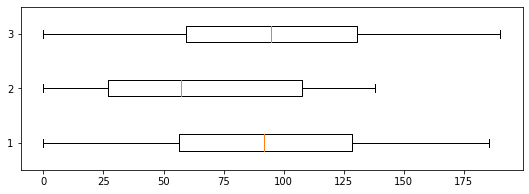

In [4]:
plt.figure(figsize=(9, 3))
plt.boxplot([data[0]['product'], data[1]['product'], data[2]['product']], vert=False)
plt.show()

In [15]:
d = data[1].head(10000)
target = d['product']
features = d.drop('product', axis=1)
model = LinearRegression()
model.fit(features, target)
predicted = model.predict(features)
print(mean_squared_error(target, predicted, squared=False))

p = pd.Series(predicted)
t = target.reset_index(drop=True)
aa=pd.concat([p, t, (p-t)],axis=1)
aa.columns = ['p','t','p-t']
print(aa.head())
print(aa['p-t'].sum()/len(aa))

0.880335238658402
            p           t       p-t
0    3.861430    3.179103  0.682328
1   26.598774   26.953261 -0.354487
2  135.675020  134.766305  0.908715
3  138.558813  137.945408  0.613406
4  134.880887  134.766305  0.114582
-2.0257573396520456e-14


In [12]:
state = np.random.RandomState(12345)
for i in range(3):
  target = data[i]['product']
  features = data[i].drop('product', axis=1)
  features_train, features_valid, target_train, target_valid = train_test_split(
      features, target, test_size=0.25, random_state=state)
  model = LinearRegression()
  model.fit(features_train, target_train)
  predicted_valid = model.predict(features_valid)
  print(f'\n#### Region{i} ####')
  print('RMSE:', mean_squared_error(target_valid, predicted_valid, squared=False))
  print('mean target_valid:', target_valid.mean())
  print('mean predicted_valid:', predicted_valid.mean())



#### Region0 ####
RMSE: 37.5794217150813
mean target_valid: 92.07859674082941
mean predicted_valid: 92.59256778438038

#### Region1 ####
RMSE: 0.889736773768064
mean target_valid: 68.77162424986196
mean predicted_valid: 68.76995145799754

#### Region2 ####
RMSE: 39.958042459521614
mean target_valid: 94.74895871720257
mean predicted_valid: 95.087528122523


As Above Region 1 is quite different from the 2 other regions:
1. On one hand, average Region 1 field reserve is 68.8 - 27% less than  others
2. On the other hand, data from region 1 provide satisfacting predictions (RMSE = 0.9), while the other 2 have a very biased model (RMSE ~ 39).

In other words: Region 1 provides less profit, but with less risks...

In [0]:
N_SAMPLES = 1000
SAMPLE_SIZE = 500
state = np.random.RandomState(12345)
for i in range(3):
  reserve_volume = []
  rmse = []
  for j in range(N_SAMPLES):
    subsample = data[i].sample(n=SAMPLE_SIZE, replace=False, random_state=state)
    target = subsample['product']
    features = subsample.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=state)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse.append(mean_squared_error(target_valid, predicted_valid, squared=False))
    reserve_volume.append(target.mean())
  print(f'\n#### Region{i} ####')
  print('Avg. RMSE:', pd.Series(rmse).mean())
  print('Avg. reserve_volume:', pd.Series(reserve_volume).mean())



#### Region0 ####
Avg. RMSE: 37.75895043349853
Avg. reserve_volume: 92.44070772837819

#### Region1 ####
Avg. RMSE: 0.8934139232638153
Avg. reserve_volume: 68.91706515214761

#### Region2 ####
Avg. RMSE: 40.205403397442
Avg. reserve_volume: 94.93218213276263
